# Examen parcial 3 (calculo numerico y algebra lineal)
* Antes de enviar el archivo, $\textbf{reiniciar y ejecutar el kernel}$ para ver que el archivo se compila sin errores
* enviar el archivo jupyter sin anexos antes de las 10.10am del 30.03.2022 a mi dirección de correo electrónico: michal.hemmerling@udea.edu.co 

# Ejercicio 1

El archivo $\textbf{data_radius_density.csv}$ contiene dos columnas: radio ($ r $) y la densidad ($ \rho (r) $) de un disco plano en función del radio

El disco es lo suficientemente delgado como para que, con fines matemáticos, podamos tratarlo como un objeto bidimensional. Asumimos que la densidad se da en términos de masa por unidad de área (llamada densidad de área), y además asumimos que la densidad varía solo a lo largo del radio del disco (llamada densidad radial). Orientamos el disco en el plano xy, con el centro en el origen. Entonces, la densidad del disco puede ser tratada como una función de x, denotada $\rho(x)$.
<table><tr>
<td> <img src="disk_radius_density.png" width="500" /> </td>
</tr></table>   

* a) importar los datos usando Pandas, graficar la densidad del disco frente a su radio (los gráficos deben tener etiquetas para el eje `x` y el eje `y`).

* b) sabiendo que la masa del disco viene dada por una integral:
$$ m = \int_0^{r} 2 \pi \ r * \rho (r) \ dr $$
     calcular la masa del disco mediante integración numérica

* Pista:`x`: is radius and `y`: is ***integrand***


In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.integrate as integrate
from scipy.interpolate import interp1d

In [6]:
Data1 = pd.read_csv('data_radius_density.csv')
Data1

,radius,density
0,0.000000,0.000000
1,0.040404,0.201008
2,0.080808,0.284268
3,0.121212,0.348155
4,0.161616,0.402015
...,...,...
95,3.838384,1.959179
96,3.878788,1.969464
97,3.919192,1.979695
98,3.959596,1.989873


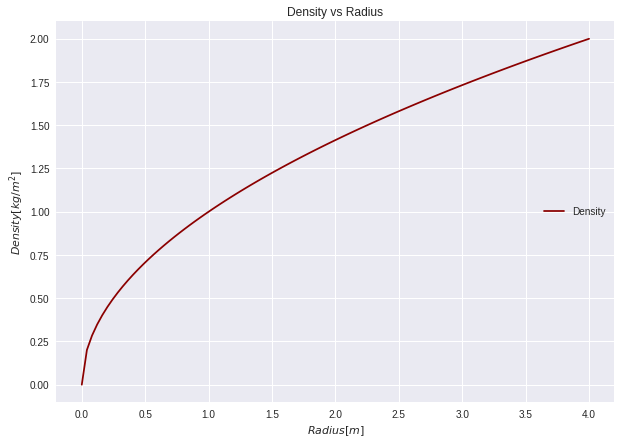

In [36]:
# PUNTO a).
plt.style.use("seaborn")
fig, ax = plt.subplots(figsize = (10,7))

ax.set_title("Density vs Radius")
ax.set_xlabel("$Radius[m]$")
ax.set_ylabel("$Density[kg/m^2]$")

ax.plot(Data1["radius"], Data1["density"], color = "darkred", label = "Density")
ax.legend(loc = "center right")
print("")

In [55]:
# PUNTO b).
X = Data1["radius"]
Y = Data1["density"] * 2*np.pi*X

m = integrate.simps(Y,X)

print(f"La masa del disco es de: {m:.2f} kg.")

La masa del disco es de: 80.42 kg.


# Ejercicio 2

La capacidad calorífica de un gas muy frío se puede aproximar mediante:

$$ C_v \approx \left (\frac{dP}{dT} \right) $$
(en las unidades de $ \left [\frac {J} {K} \right] $)

Donde $P$ es la presión $ [J / s^3] $ del gas y $ T \ [K] $ es la temperatura del gas.

Los datos para la presión frente a la temperatura se dan en el archivo csv ($ \textbf{data_pressure_vs_temperature.csv} $).

* a) importar los datos usando pandas
* b) hacer un gráfico de $P$ vs $T$ (grafico tiene que tener etiquietas)
* c) utilizando la derivada numérica, encuentre la capacidad calorífica.
* d) hacer un gráfico de $C_v$ vs $T$ (grafico tiene que tener etiquietas)
* e) usando el ultimo grafico hace una estimacion de Temperatura Critica de este gas (Temperatura Critica es Temperatura de cambio abrupto del comportamiento de Capacidad Termica)
* f) hace interpolacion cubica (100 puntos) de los valores de pression $P$, repite puntos `c)` y `d)`

*gas muy frío se refiere a un gas Bose no homogéneo, y la teoría que relaciona $ C_v $ y $ P $ se refiere a la Teoría de Variables Globales Termodinámicas. La presión en realidad se llama parámetro de presión.

In [34]:
# PUNTO a).
Data2 = pd.read_csv('data_pressure_vs_temparature.csv')
Data2

,Temperature,Pressure
0,4.789201e-08,1.958251e-17
1,6.625061e-08,2.055515e-17
2,8.460922e-08,2.237848e-17
3,1.029678e-07,2.534132e-17
4,1.213264e-07,2.994527e-17
5,1.396850e-07,3.681453e-17
6,1.580436e-07,4.642824e-17
7,1.764022e-07,5.895152e-17
8,1.947608e-07,7.447724e-17
9,2.131194e-07,9.347272e-17


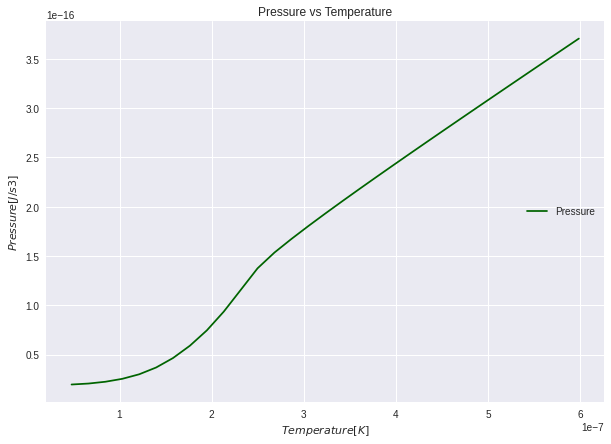

In [37]:
# PUNTO b).
fig, ax = plt.subplots(figsize = (10,7))

ax.set_title("Pressure vs Temperature")
ax.set_xlabel("$Temperature[K]$")
ax.set_ylabel("$Pressure[J/s3]$")

ax.plot(Data2["Temperature"], Data2["Pressure"], color = "darkgreen", label = "Pressure")
ax.legend(loc = "center right")
print("")

In [49]:
# PUNTO c).
X = Data2["Temperature"]
Y = Data2["Pressure"]

Cv = np.gradient(Y, X)

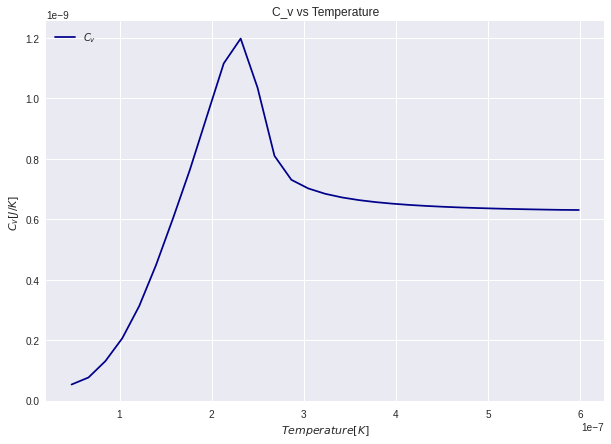

In [41]:
# PUNTO d).
fig, ax = plt.subplots(figsize = (10,7))

ax.set_title("C_v vs Temperature")
ax.set_xlabel("$Temperature[K]$")
ax.set_ylabel("$C_v[J/K]$")

ax.plot(Data2["Temperature"], Cv, color = "darkblue", label = "$C_v$")
ax.legend(loc = "upper left")
print("")

In [47]:
# PUNTO e).

# Vemos que la temperatura crítica de este gas está alrededor de 2.3e-7 K.

In [53]:
# PUNTO f).
Xi = np.linspace(Data2["Temperature"][0], Data2["Temperature"][30], 100)
intrp = interp1d(X, Y, kind='cubic')

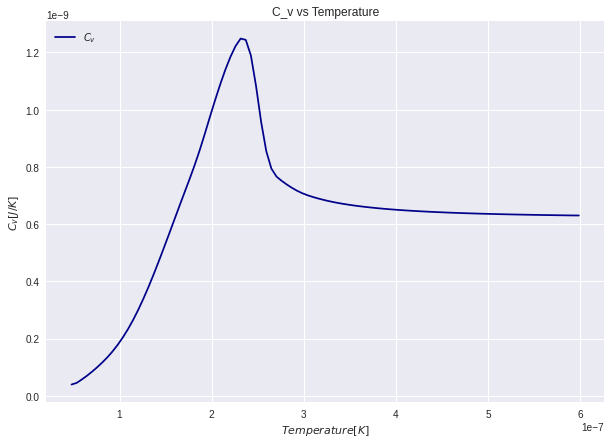

In [54]:
Cv = np.gradient(intrp(Xi), Xi)

fig, ax = plt.subplots(figsize = (10,7))

ax.set_title("C_v vs Temperature")
ax.set_xlabel("$Temperature[K]$")
ax.set_ylabel("$C_v[J/K]$")

ax.plot(Xi, Cv, color = "darkblue", label = "$C_v$")
ax.legend(loc = "upper left")
print("")

# Ejercicio 3

Dada es Matrix $S$:

$$S=
\begin{bmatrix}
1 &  -1 & -1 & -1\\
-1 &  2 & 0 & 0\\
-1 &  3 & 3 & 0 \\
-1 &  0 & 1 & 4 \\
\end{bmatrix}$$


a) calcular $S^5$ utilizando diagonalización.  

b) crear una funcion `matrix_power(A,n)` que recive dos parametros: matrix $A$, y valor entero de la potencia $n$. Funcion tiene que devolver una matrix $M=A^n$ (usa diagonalizacion)

In [60]:
# PUNTO a).
S = np.array([[1,-1,-1,-1],
            [-1,2,0,0],
            [-1,3,3,0],
            [-1,0,1,4]])
S

array([[ 1, -1, -1, -1],
       [-1,  2,  0,  0],
       [-1,  3,  3,  0],
       [-1,  0,  1,  4]])

In [64]:
evalues, evectors = np.linalg.eig(S)
P = evectors
D = np.diag(evalues)
D = np.diag(evalues**5)

S5 = P@D@np.linalg.inv(P)
S5

array([[  485.,  -755.,  -563.,  -563.],
       [ -179.,   280.,   192.,   192.],
       [ -675.,  1201.,   707.,   464.],
       [-1027.,  1448.,  1275.,  1518.]])

In [66]:
# PUNTO b).

def my_matrix_power(A, n):
  evalues, evectors = np.linalg.eig(A)
  P = evectors
  D = np.diag(evalues**n)

  result = P@D@np.linalg.inv(P)

  return result

In [67]:
my_matrix_power(S, 5)

array([[  485.,  -755.,  -563.,  -563.],
       [ -179.,   280.,   192.,   192.],
       [ -675.,  1201.,   707.,   464.],
       [-1027.,  1448.,  1275.,  1518.]])

In [68]:
# COMPARACION
Spow = np.linalg.matrix_power(S, 5)
print(Spow)

[[  485  -755  -563  -563]
 [ -179   280   192   192]
 [ -675  1201   707   464]
 [-1027  1448  1275  1518]]


# Feedback:
```
Exercise 1.
Importation of the data + labeled plot (rho vs. r)	            (max 0.5p):	0.5p
Calculation of the integral                 		              (max 1.5p):	1.5p

Exercise 2.
Importation of the data + labeled plot P vs. T 	               (max 0.5p):	0.5p
Calculation of the derivative and plot Cv vs. T        		   (max 2.0p):	2.0p
Approximation of the critical temperature                         (max 0.5p):	0.5p
Interpolation                                                     (max 1.0p):	1.0p

Exercise 3.
Calculation of the M^n                                 	       (max 2.0p):	2.0p
Function of the M^n                                    	       (max 2.0p):	2.0p

- Total:                                                          (max 10.0p):   10.0p
```